### Vizualizaciónes iniciales; 
pd: bueno aqui voy a tomar los datos y ver que ondita

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar directamente con latin-1 (codificación más común para archivos gubernamentales chilenos)
df_td = pd.read_csv('data/fa2025/01OCTratoDirecto.csv', delimiter=';', encoding='latin-1')
df_cm = pd.read_csv('data/fa2025/01OCConvenioMarco.csv', delimiter=';', encoding='latin-1')
df_lic = pd.read_csv('data/fa2025/01OCLicitacion.csv', delimiter=';', encoding='latin-1')

df_td.head(3)

/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_32679/1805694312.py:3: DtypeWarning: Columns (10,11,12,14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cm = pd.read_csv('data/fa2025/01OCConvenioMarco.csv', delimiter=';', encoding='latin-1')


,codigoOC,FechaEnvioOC,NombreOC,DescripcionOC,EstadoOC,ProcedenciaOC,MonedaOC,MontoNetoOC,DescuentosOC,CargosOC,...,DescripcionItem,CantidadItem,UnidadMedida,MonedaItem,MontoNetoItem,DescuentoItem,CargosItem,ImpuestoEspecificoItem,MontoTotalItem,MontoNetoItemCLP
0,5225-164-SE24,03-01-2025 0:00:00,ADQ. DE MEDICAMENTOS FARMACIA NAVAL,TI: 332004-1601 ADQUISICION DE MEDICAMENTOS ...,Recepcion Conforme,Trato Directo,CLP,1778324,0,0,...,DICIL LOCION 1% X 30 ML C/VALVULA SP,60,Unidad no definida,CLP,2649,0,0,0,158940,158940
1,5225-164-SE24,03-01-2025 0:00:00,ADQ. DE MEDICAMENTOS FARMACIA NAVAL,TI: 332004-1601 ADQUISICION DE MEDICAMENTOS ...,Recepcion Conforme,Trato Directo,CLP,1778324,0,0,...,"LIDIL LACA PARA UÑAS 5% 2,5ML",10,Unidad no definida,CLP,7685,0,0,0,76850,76850
2,3191-5522-SE24,30-01-2025 0:00:00,PU (CON) ADQUISICION DE INSUMOS CLÍNICOS,OC. 257001-257002-257003-257004-257005-257006-...,Recepcion Conforme,Trato Directo,CLP,5195470,0,0,...,3086418 - 5 FRESA PM2-150 DIAMOND 80K 3.1,9,Unidad,CLP,271500,0,0,0,2443500,2443500


### Limpieza de datos

In [ ]:

def limpiar_montos(df):

    df_clean = df.copy()
    if 'MontoTotalOC' in df_clean.columns:
      
        df_clean['MontoTotalOC'] = df_clean['MontoTotalOC'].astype(str)
       
        df_clean['MontoTotalOC'] = df_clean['MontoTotalOC'].str.replace('.', '')
        df_clean['MontoTotalOC'] = df_clean['MontoTotalOC'].str.replace(',', '.')
        df_clean['MontoTotalOC'] = pd.to_numeric(df_clean['MontoTotalOC'], errors='coerce')
    return df_clean

# Limpiar los datos
df_td_clean = limpiar_montos(df_td)
df_cm_clean = limpiar_montos(df_cm)
df_lic_clean = limpiar_montos(df_lic)


### Exploración y vizualizaciones en distintos campos
kortezia de copilot

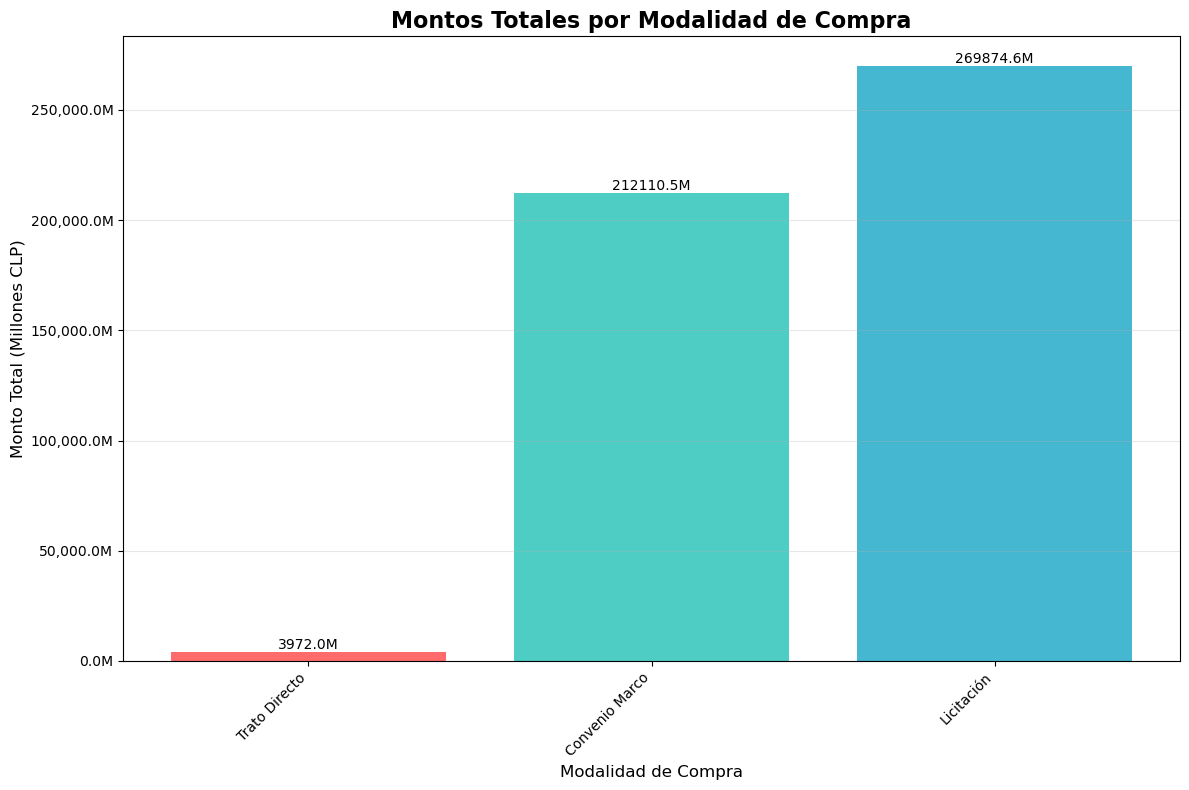


Montos totales por modalidad:
Trato Directo: $3,971,960,160 CLP
Convenio Marco: $212,110,473,002 CLP
Licitación: $269,874,633,187 CLP


In [14]:
# Comparar montos totales por modalidad
modalidades = ['Trato Directo', 'Convenio Marco', 'Licitación']
montos_totales = [
    df_td_clean['MontoTotalOC'].sum(), 
    df_cm_clean['MontoTotalOC'].sum(), 
    df_lic_clean['MontoTotalOC'].sum()
]

# Convertir a millones para mejor visualización
montos_millones = [monto / 1000000 for monto in montos_totales]

plt.figure(figsize=(12, 8))
bars = plt.bar(modalidades, montos_millones, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])

# Personalizar el gráfico
plt.title('Montos Totales por Modalidad de Compra', fontsize=16, fontweight='bold')
plt.ylabel('Monto Total (Millones CLP)', fontsize=12)
plt.xlabel('Modalidad de Compra', fontsize=12)

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Agregar valores en las barras
for bar, monto in zip(bars, montos_millones):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{monto:.1f}M',
             ha='center', va='bottom', fontsize=10)

# Formatear eje y con comas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.1f}M'))

# Ajustar layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar grid para mejor lectura
plt.grid(axis='y', alpha=0.3)

plt.show()

# Mostrar también los valores exactos
print("\nMontos totales por modalidad:")
for modalidad, monto in zip(modalidades, montos_totales):
    print(f"{modalidad}: ${monto:,.0f} CLP")

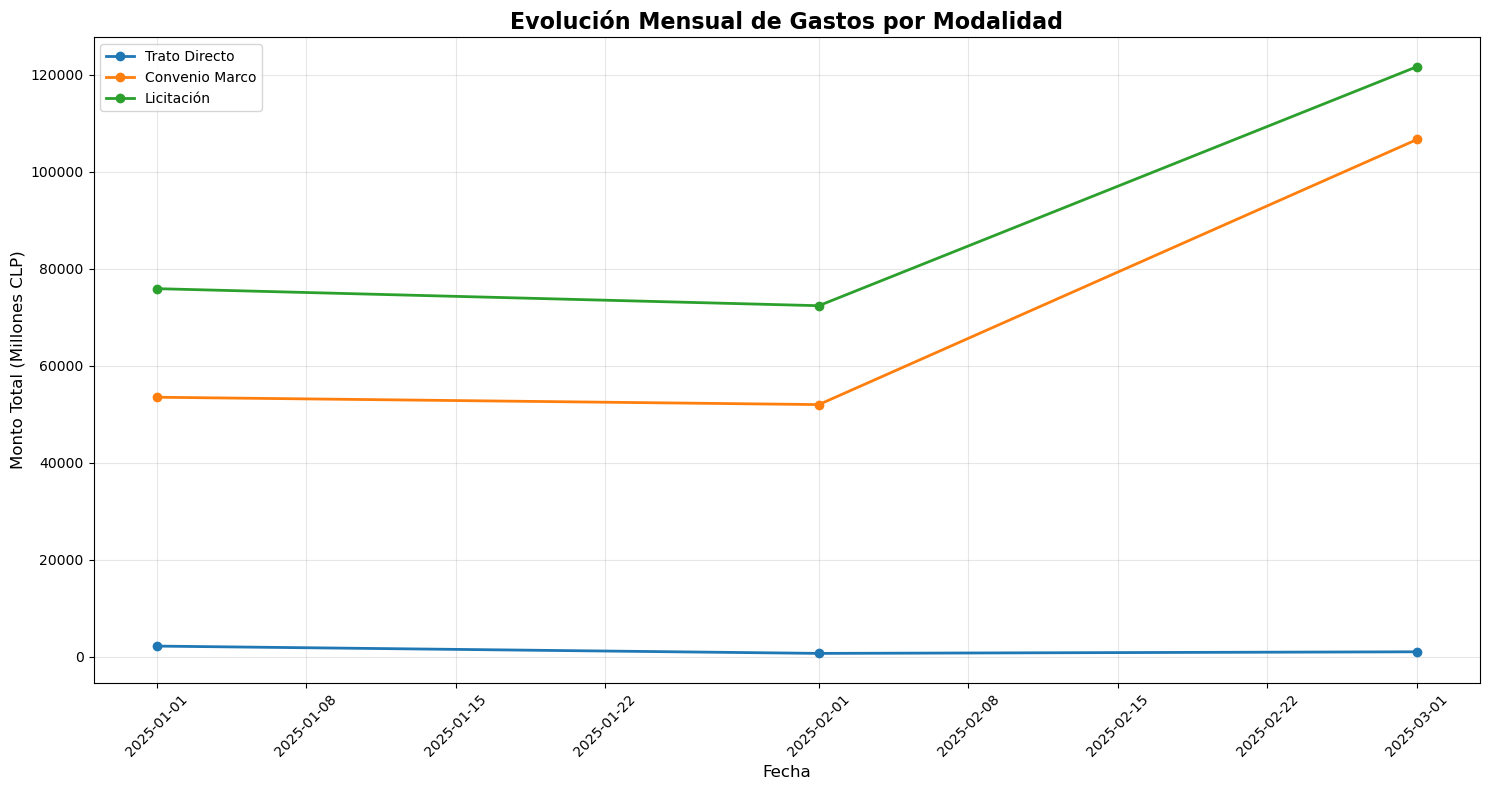

In [24]:
# Análisis temporal de gastos
# Primero, limpiar y convertir fechas
def analizar_temporal(df, nombre_dataset):
    df_temp = df.copy()
    df_temp['FechaEnvioOC'] = pd.to_datetime(df_temp['FechaEnvioOC'], errors='coerce', dayfirst=True)
    df_temp['Año'] = df_temp['FechaEnvioOC'].dt.year
    df_temp['Mes'] = df_temp['FechaEnvioOC'].dt.month
    df_temp['Trimestre'] = df_temp['FechaEnvioOC'].dt.quarter
    df_temp['Dataset'] = nombre_dataset
    return df_temp

# Aplicar a todos los datasets
df_td_temp = analizar_temporal(df_td_clean, 'Trato Directo')
df_cm_temp = analizar_temporal(df_cm_clean, 'Convenio Marco')
df_lic_temp = analizar_temporal(df_lic_clean, 'Licitación')

# Combinar todos los datasets
df_combined = pd.concat([df_td_temp, df_cm_temp, df_lic_temp], ignore_index=True)


plt.figure(figsize=(15, 8))
gastos_mensuales = df_combined.groupby(['Año', 'Mes', 'Dataset'])['MontoTotalOC'].sum().reset_index()

# Crear fecha de manera más simple
gastos_mensuales['Fecha'] = gastos_mensuales['Año'].astype(str) + '-' + gastos_mensuales['Mes'].astype(str).str.zfill(2) + '-01'
gastos_mensuales['Fecha'] = pd.to_datetime(gastos_mensuales['Fecha'])

for dataset in ['Trato Directo', 'Convenio Marco', 'Licitación']:
    data = gastos_mensuales[gastos_mensuales['Dataset'] == dataset]
    plt.plot(data['Fecha'], data['MontoTotalOC']/1000000, marker='o', label=dataset, linewidth=2)

plt.title('Evolución Mensual de Gastos por Modalidad', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Monto Total (Millones CLP)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

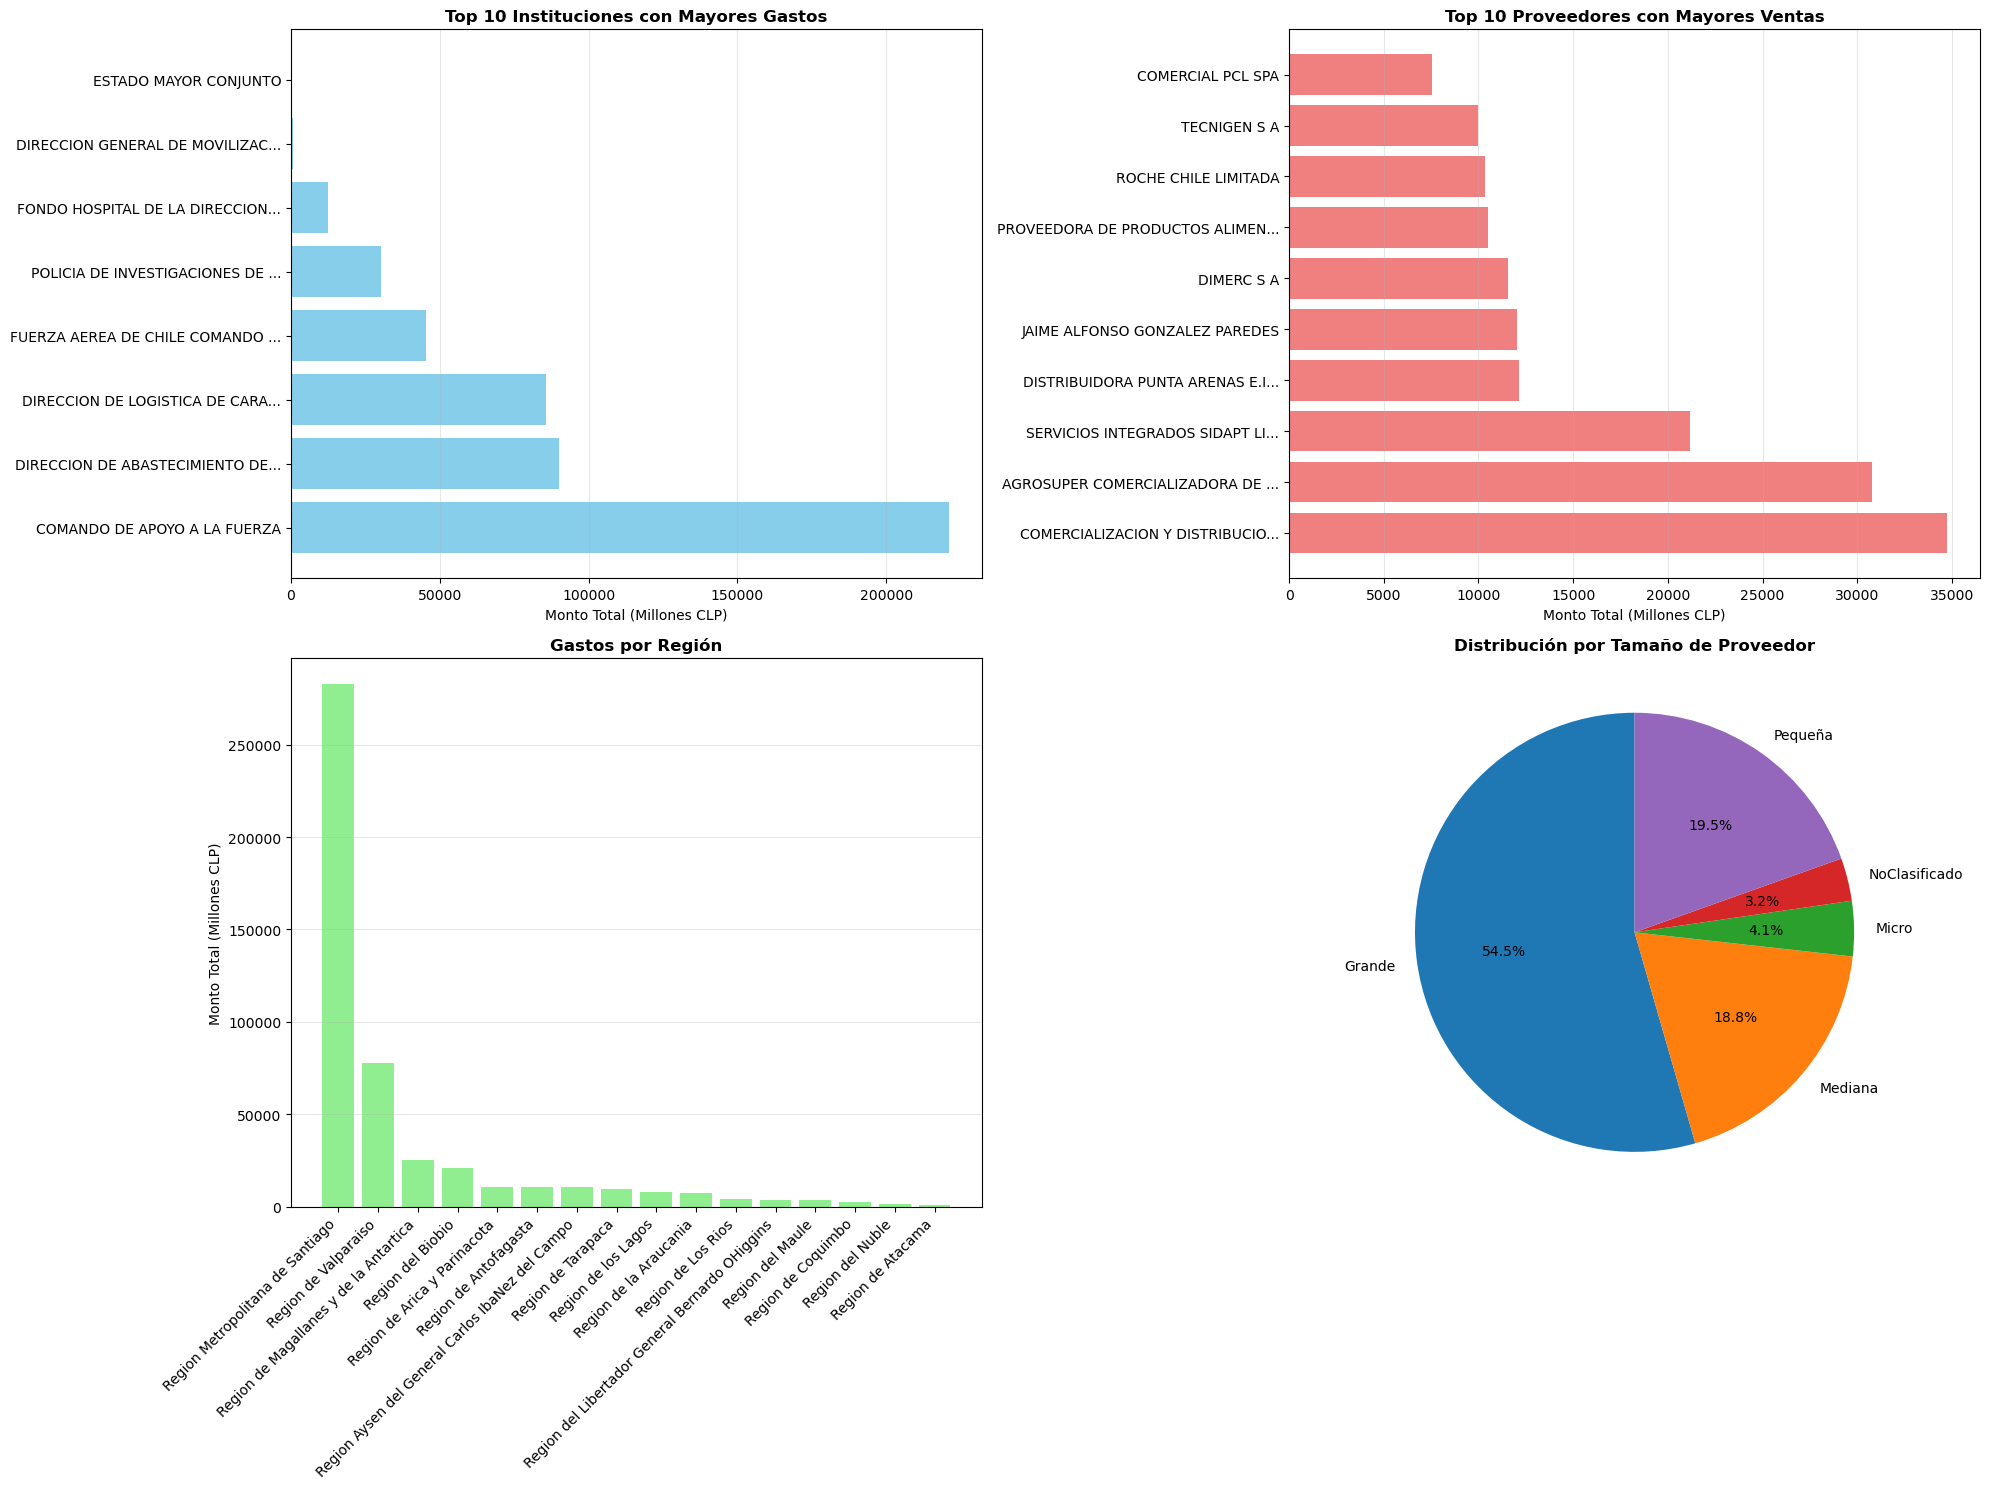

In [16]:
# Análisis de top instituciones
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Top 10 Instituciones
top_instituciones = df_combined.groupby('Institucion')['MontoTotalOC'].sum().sort_values(ascending=False).head(10)
axes[0,0].barh(range(len(top_instituciones)), top_instituciones.values/1000000, color='skyblue')
axes[0,0].set_yticks(range(len(top_instituciones)))
axes[0,0].set_yticklabels([inst[:30] + '...' if len(inst) > 30 else inst for inst in top_instituciones.index])
axes[0,0].set_xlabel('Monto Total (Millones CLP)')
axes[0,0].set_title('Top 10 Instituciones con Mayores Gastos', fontweight='bold')
axes[0,0].grid(axis='x', alpha=0.3)

# Top 10 Proveedores
top_proveedores = df_combined.groupby('Proveedor')['MontoTotalOC'].sum().sort_values(ascending=False).head(10)
axes[0,1].barh(range(len(top_proveedores)), top_proveedores.values/1000000, color='lightcoral')
axes[0,1].set_yticks(range(len(top_proveedores)))
axes[0,1].set_yticklabels([prov[:30] + '...' if len(prov) > 30 else prov for prov in top_proveedores.index])
axes[0,1].set_xlabel('Monto Total (Millones CLP)')
axes[0,1].set_title('Top 10 Proveedores con Mayores Ventas', fontweight='bold')
axes[0,1].grid(axis='x', alpha=0.3)

# Distribución por Región
gastos_region = df_combined.groupby('RegionUnidadCompra')['MontoTotalOC'].sum().sort_values(ascending=False)
axes[1,0].bar(range(len(gastos_region)), gastos_region.values/1000000, color='lightgreen')
axes[1,0].set_xticks(range(len(gastos_region)))
axes[1,0].set_xticklabels(gastos_region.index, rotation=45, ha='right')
axes[1,0].set_ylabel('Monto Total (Millones CLP)')
axes[1,0].set_title('Gastos por Región', fontweight='bold')
axes[1,0].grid(axis='y', alpha=0.3)

# Distribución por Tamaño de Proveedor
if 'TamanoProveedor' in df_combined.columns:
    tamano_prov = df_combined.groupby('TamanoProveedor')['MontoTotalOC'].sum()
    axes[1,1].pie(tamano_prov.values, labels=tamano_prov.index, autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Distribución por Tamaño de Proveedor', fontweight='bold')
else:
    axes[1,1].text(0.5, 0.5, 'Columna TamanoProveedor\nno disponible', ha='center', va='center')
    axes[1,1].set_title('Tamaño de Proveedor - No Disponible')

plt.tight_layout()
plt.show()

Columnas de rubros encontradas: ['RubroN1', 'RubroN2', 'RubroN3']


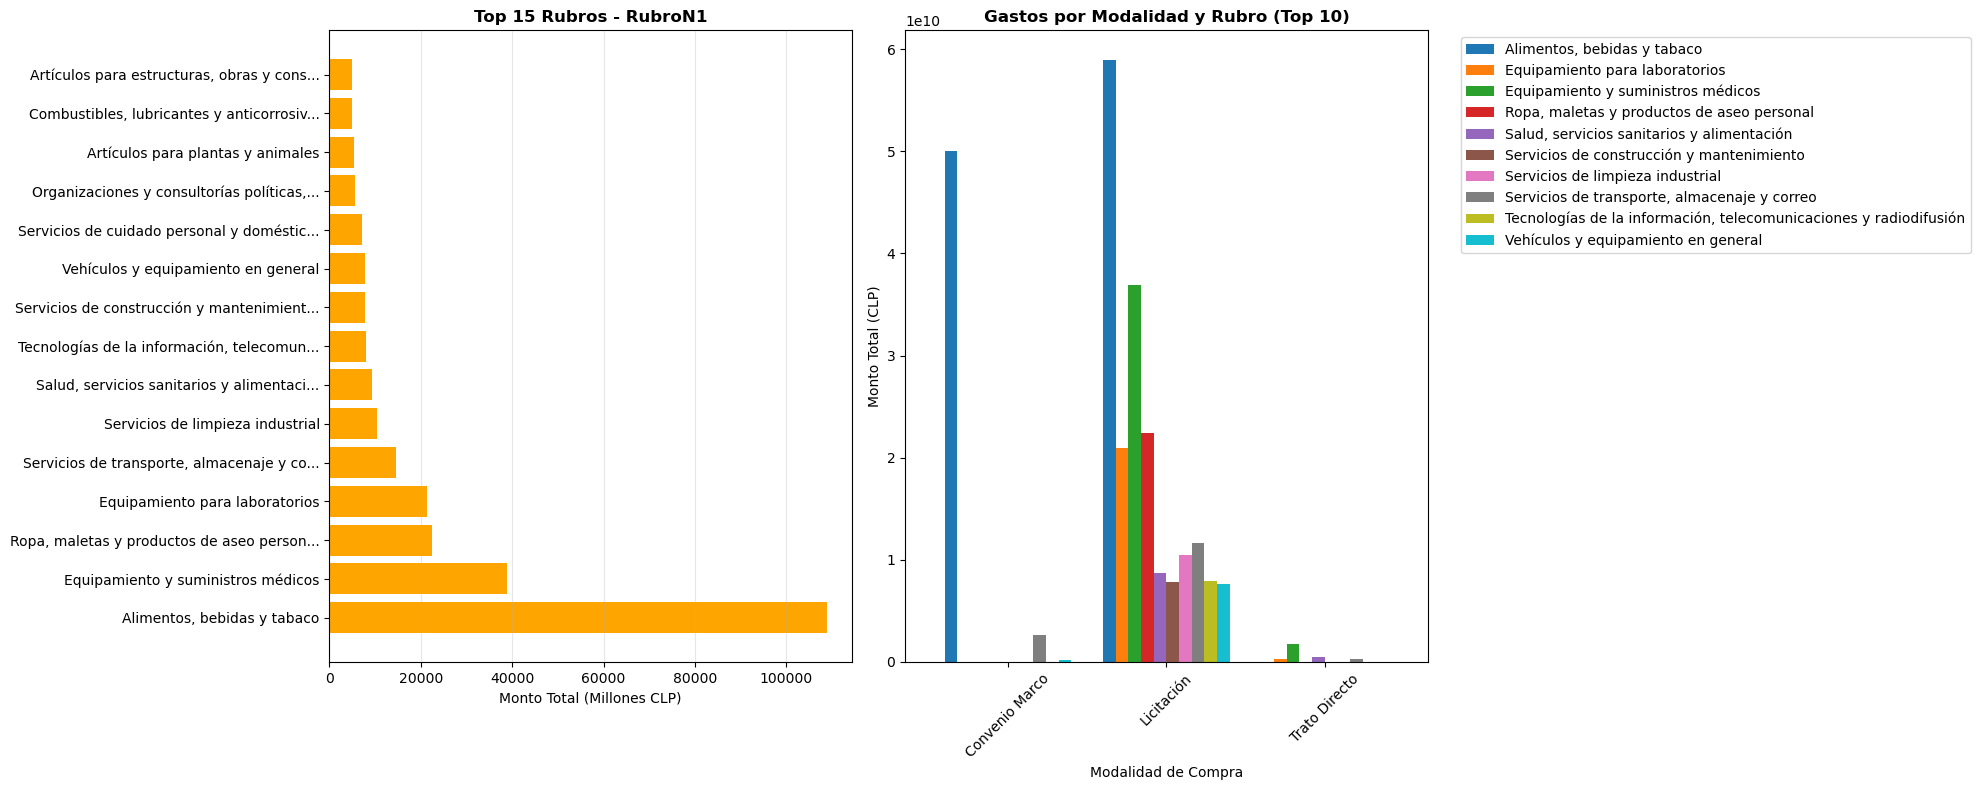

In [18]:
# Análisis por rubros
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Buscar columnas de rubros
rubro_cols = [col for col in df_combined.columns if 'rubro' in col.lower() or 'categoria' in col.lower()]
print(f"Columnas de rubros encontradas: {rubro_cols}")

if rubro_cols:
    # Usar la primera columna de rubro encontrada
    rubro_col = rubro_cols[0]
    
    # Top 15 Rubros
    top_rubros = df_combined.groupby(rubro_col)['MontoTotalOC'].sum().sort_values(ascending=False).head(15)
    axes[0].barh(range(len(top_rubros)), top_rubros.values/1000000, color='orange')
    axes[0].set_yticks(range(len(top_rubros)))
    axes[0].set_yticklabels([rubro[:40] + '...' if len(str(rubro)) > 40 else str(rubro) for rubro in top_rubros.index])
    axes[0].set_xlabel('Monto Total (Millones CLP)')
    axes[0].set_title(f'Top 15 Rubros - {rubro_col}', fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Distribución por modalidad y rubro (top 10)
    top_10_rubros = top_rubros.head(10).index
    modalidad_rubro = df_combined[df_combined[rubro_col].isin(top_10_rubros)].groupby(['Dataset', rubro_col])['MontoTotalOC'].sum().unstack(fill_value=0)
    
    modalidad_rubro.plot(kind='bar', ax=axes[1], width=0.8)
    axes[1].set_title('Gastos por Modalidad y Rubro (Top 10)', fontweight='bold')
    axes[1].set_xlabel('Modalidad de Compra')
    axes[1].set_ylabel('Monto Total (CLP)')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].tick_params(axis='x', rotation=45)
    
else:
    axes[0].text(0.5, 0.5, 'No se encontraron\ncolumnas de rubros', ha='center', va='center')
    axes[1].text(0.5, 0.5, 'No se encontraron\ncolumnas de rubros', ha='center', va='center')

plt.tight_layout()
plt.show()

/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_32679/1369698210.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(modalidad_data, labels=['Trato Directo', 'Convenio Marco', 'Licitación'])


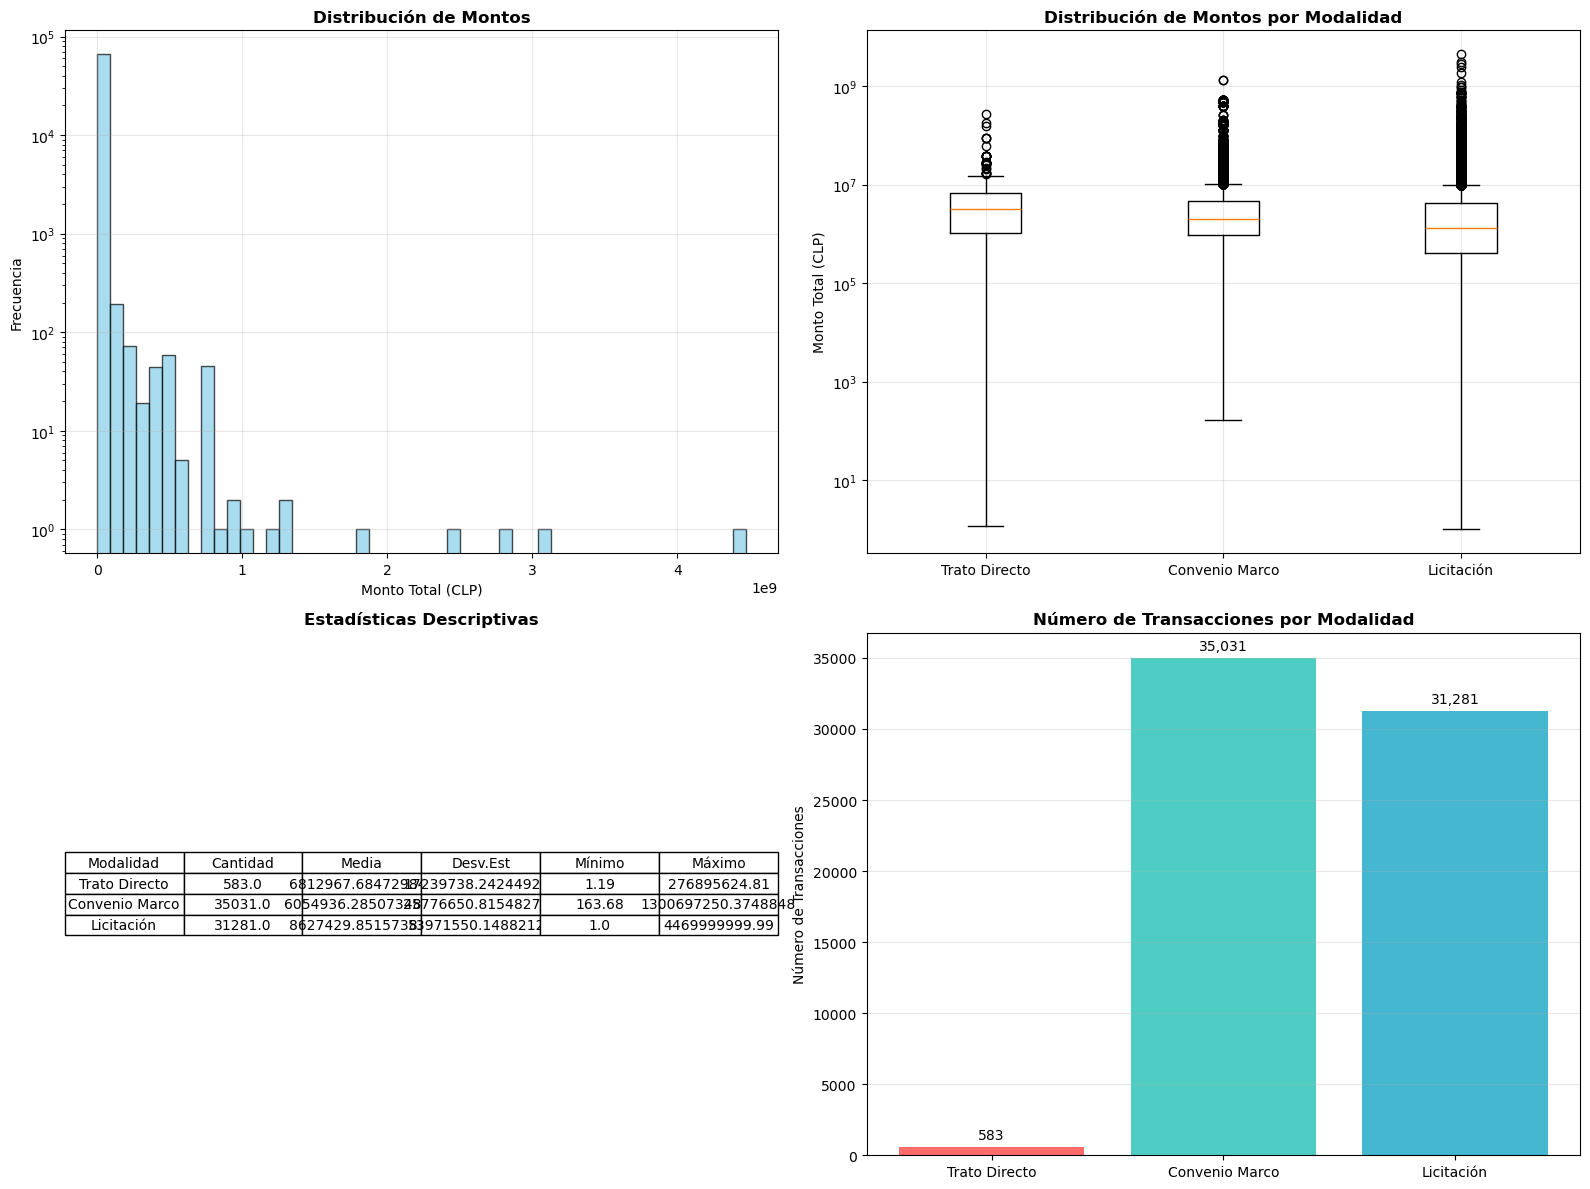

In [19]:
# Análisis de distribución de montos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de montos (escala logarítmica)
axes[0,0].hist(df_combined['MontoTotalOC'].dropna(), bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Monto Total (CLP)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_title('Distribución de Montos', fontweight='bold')
axes[0,0].set_yscale('log')
axes[0,0].grid(True, alpha=0.3)

# Box plot por modalidad
modalidad_data = [df_td_clean['MontoTotalOC'].dropna(), 
                  df_cm_clean['MontoTotalOC'].dropna(), 
                  df_lic_clean['MontoTotalOC'].dropna()]
axes[0,1].boxplot(modalidad_data, labels=['Trato Directo', 'Convenio Marco', 'Licitación'])
axes[0,1].set_ylabel('Monto Total (CLP)')
axes[0,1].set_title('Distribución de Montos por Modalidad', fontweight='bold')
axes[0,1].set_yscale('log')
axes[0,1].grid(True, alpha=0.3)

# Estadísticas descriptivas
stats_data = []
for nombre, df in [('Trato Directo', df_td_clean), ('Convenio Marco', df_cm_clean), ('Licitación', df_lic_clean)]:
    stats = df['MontoTotalOC'].describe()
    stats_data.append([nombre, stats['count'], stats['mean'], stats['std'], stats['min'], stats['max']])

stats_df = pd.DataFrame(stats_data, columns=['Modalidad', 'Cantidad', 'Media', 'Desv.Est', 'Mínimo', 'Máximo'])
axes[1,0].axis('tight')
axes[1,0].axis('off')
table = axes[1,0].table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1,0].set_title('Estadísticas Descriptivas', fontweight='bold')

# Número de transacciones por modalidad
num_transacciones = [len(df_td_clean), len(df_cm_clean), len(df_lic_clean)]
axes[1,1].bar(modalidades, num_transacciones, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,1].set_ylabel('Número de Transacciones')
axes[1,1].set_title('Número de Transacciones por Modalidad', fontweight='bold')
axes[1,1].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(num_transacciones):
    axes[1,1].text(i, v + max(num_transacciones)*0.01, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

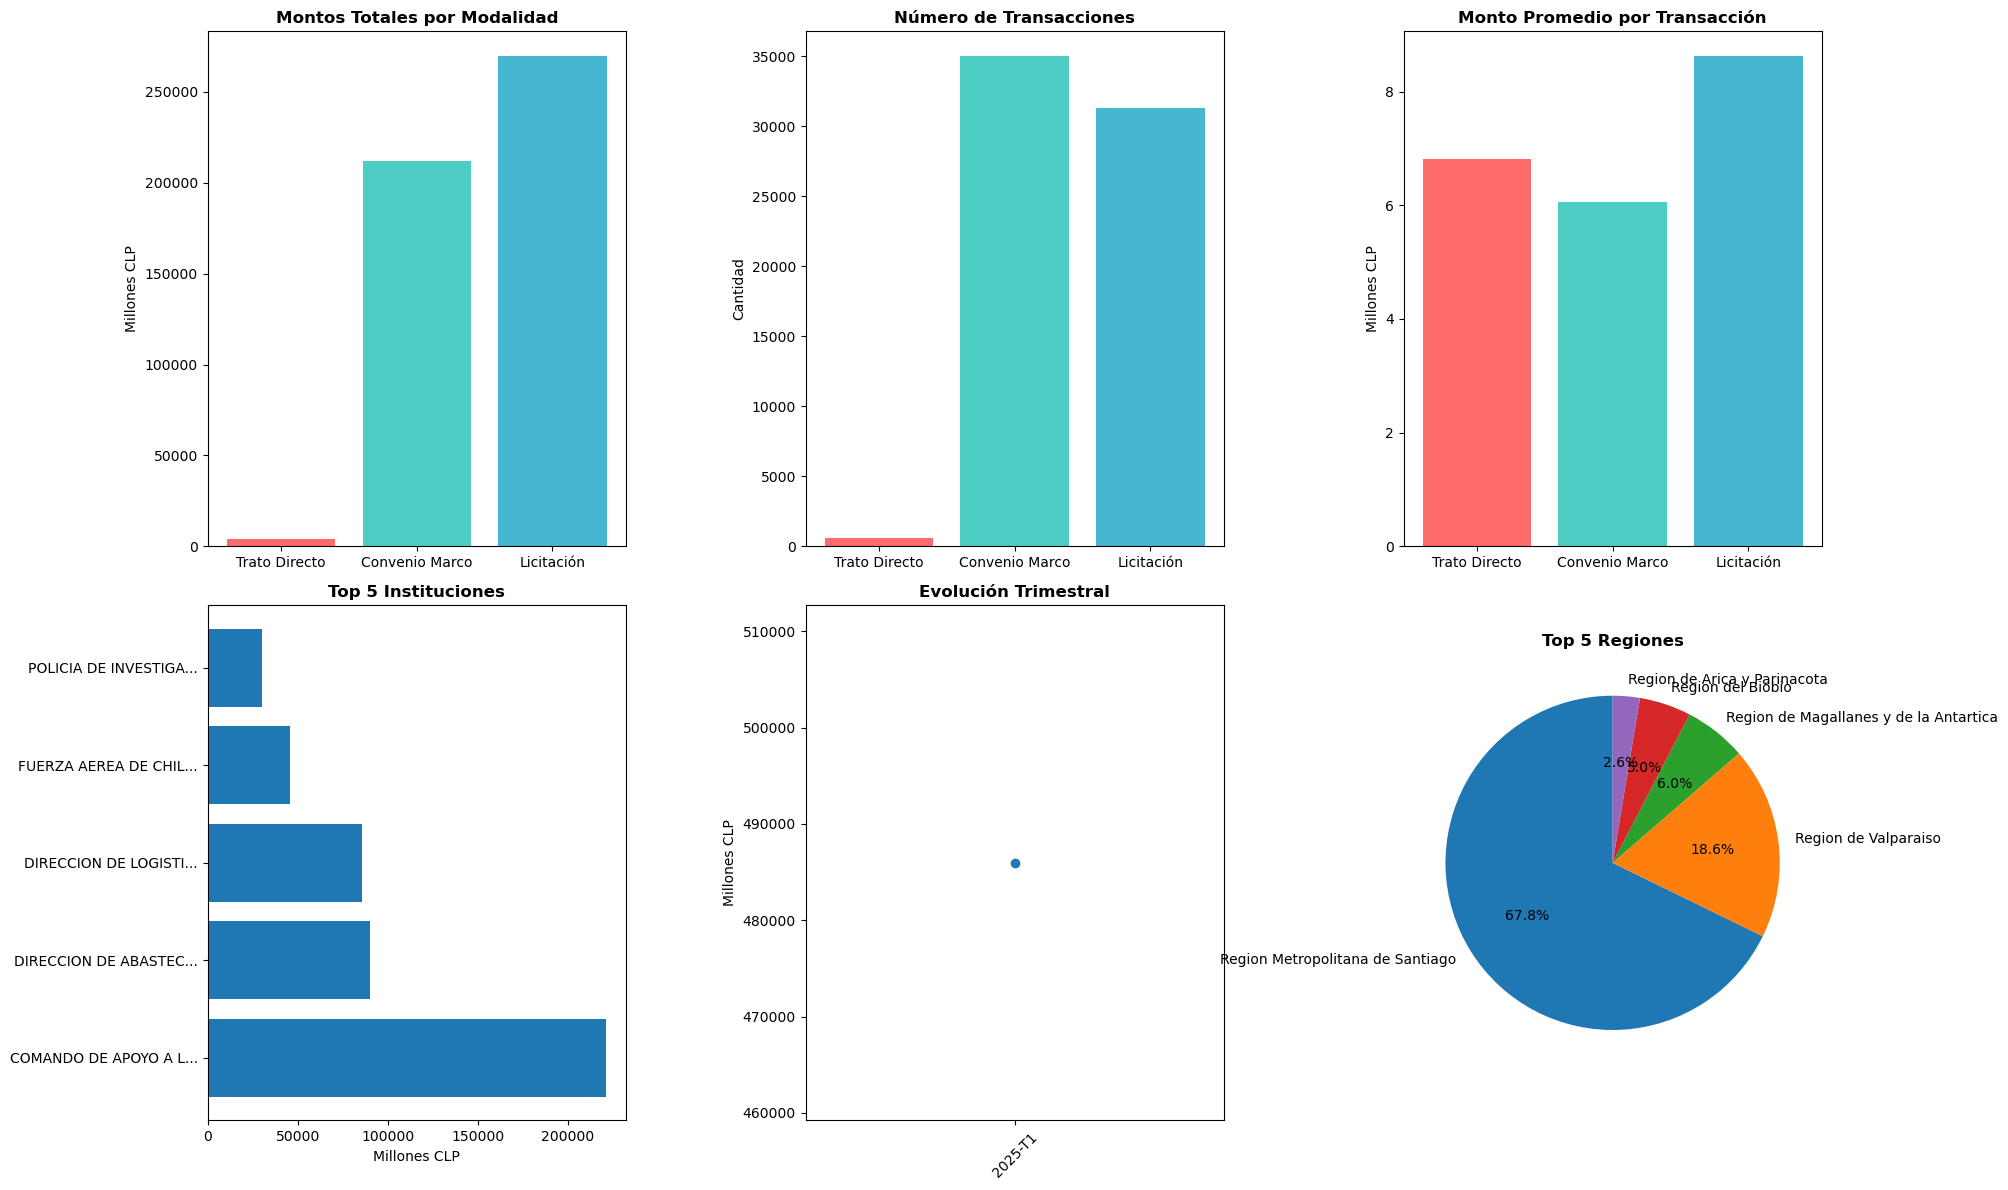


RESUMEN ESTADÍSTICO DE GASTOS FF.AA.
Total general: $485,957,066,350 CLP
Total de transacciones: 66,895
Promedio por transacción: $7,264,475 CLP

Distribución por modalidad:
Trato Directo: $3,971,960,160 CLP (0.8%)
Convenio Marco: $212,110,473,002 CLP (43.6%)
Licitación: $269,874,633,187 CLP (55.5%)


In [21]:
# Dashboard resumido
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Montos totales por modalidad
axes[0,0].bar(modalidades, montos_millones, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_title('Montos Totales por Modalidad', fontweight='bold')
axes[0,0].set_ylabel('Millones CLP')

# 2. Número de transacciones
axes[0,1].bar(modalidades, num_transacciones, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,1].set_title('Número de Transacciones', fontweight='bold')
axes[0,1].set_ylabel('Cantidad')

# 3. Monto promedio por transacción
montos_promedio = [montos_totales[i]/num_transacciones[i]/1000000 for i in range(3)]
axes[0,2].bar(modalidades, montos_promedio, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,2].set_title('Monto Promedio por Transacción', fontweight='bold')
axes[0,2].set_ylabel('Millones CLP')

# 4. Top 5 instituciones
top_5_inst = df_combined.groupby('Institucion')['MontoTotalOC'].sum().sort_values(ascending=False).head(5)
axes[1,0].barh(range(len(top_5_inst)), top_5_inst.values/1000000)
axes[1,0].set_yticks(range(len(top_5_inst)))
axes[1,0].set_yticklabels([inst[:20] + '...' if len(inst) > 20 else inst for inst in top_5_inst.index])
axes[1,0].set_title('Top 5 Instituciones', fontweight='bold')
axes[1,0].set_xlabel('Millones CLP')

# 5. Evolución trimestral
gastos_trimestre = df_combined.groupby(['Año', 'Trimestre'])['MontoTotalOC'].sum().reset_index()
gastos_trimestre['Periodo'] = gastos_trimestre['Año'].astype(str) + '-T' + gastos_trimestre['Trimestre'].astype(str)
axes[1,1].plot(gastos_trimestre['Periodo'], gastos_trimestre['MontoTotalOC']/1000000, marker='o')
axes[1,1].set_title('Evolución Trimestral', fontweight='bold')
axes[1,1].set_ylabel('Millones CLP')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Distribución por región (top 5)
top_5_regiones = df_combined.groupby('RegionUnidadCompra')['MontoTotalOC'].sum().sort_values(ascending=False).head(5)
axes[1,2].pie(top_5_regiones.values, labels=top_5_regiones.index, autopct='%1.1f%%', startangle=90)
axes[1,2].set_title('Top 5 Regiones', fontweight='bold')

plt.tight_layout()
plt.show()

# Imprimir resumen estadístico
print("\n" + "="*50)
print("RESUMEN ESTADÍSTICO DE GASTOS FF.AA.")
print("="*50)
print(f"Total general: ${sum(montos_totales):,.0f} CLP")
print(f"Total de transacciones: {sum(num_transacciones):,}")
print(f"Promedio por transacción: ${sum(montos_totales)/sum(num_transacciones):,.0f} CLP")
print("\nDistribución por modalidad:")
for i, modalidad in enumerate(modalidades):
    print(f"{modalidad}: ${montos_totales[i]:,.0f} CLP ({montos_totales[i]/sum(montos_totales)*100:.1f}%)")

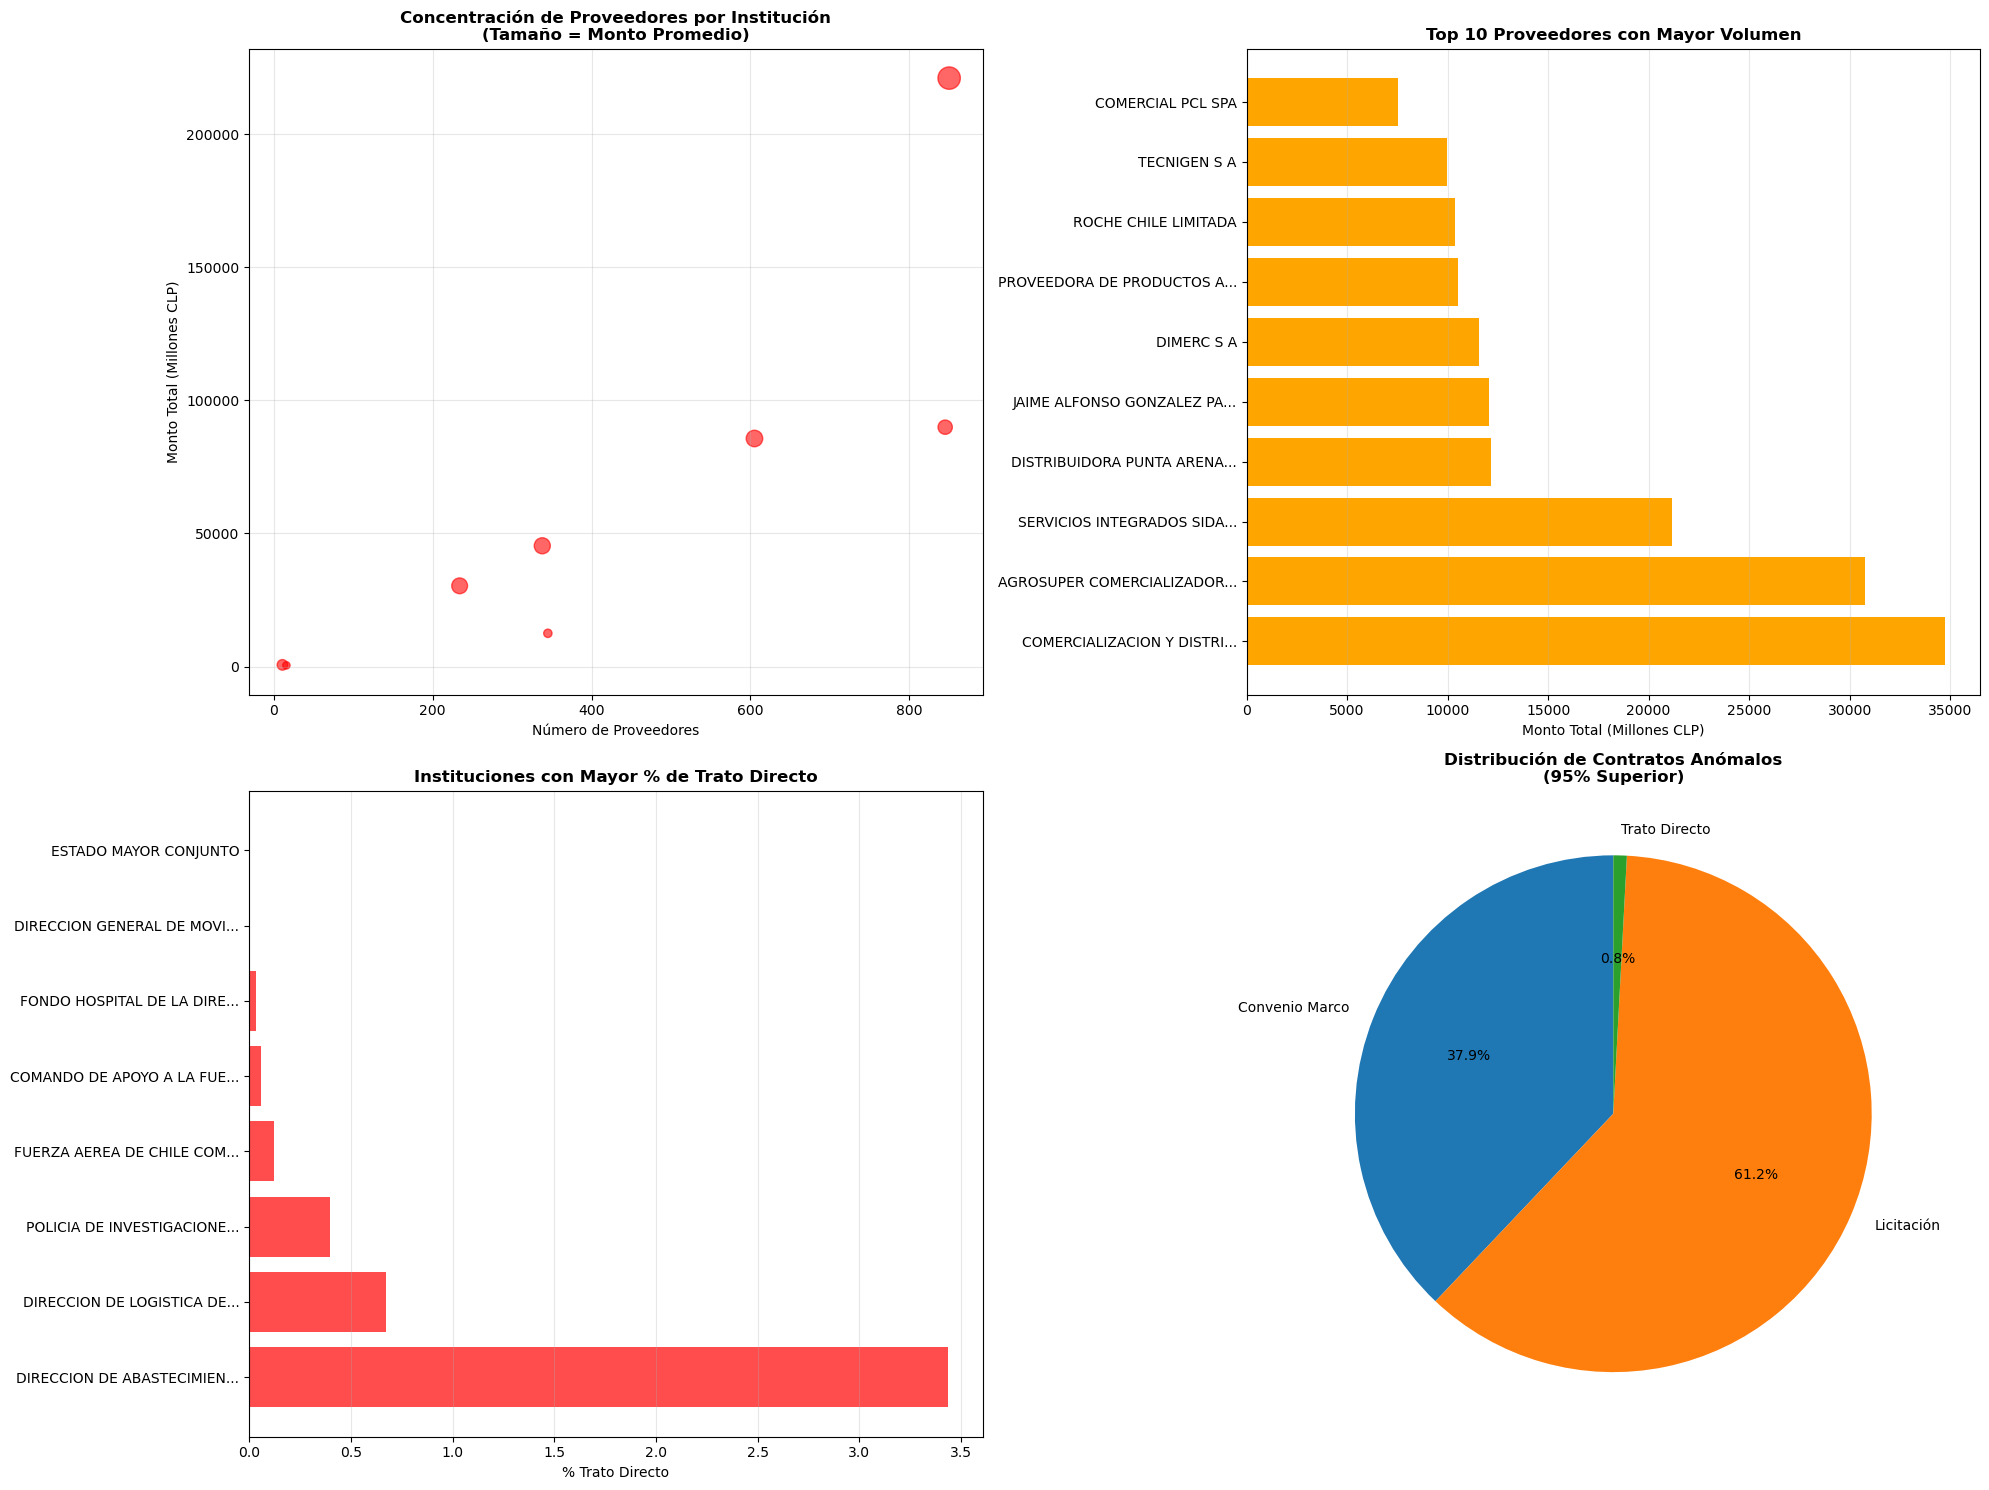

In [ ]:
# Análisis de concentración de proveedores por institución
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Concentración de proveedores por institución
prov_inst = df_combined.groupby(['Institucion', 'Proveedor'])['MontoTotalOC'].sum().reset_index()
concentracion = prov_inst.groupby('Institucion').agg({
    'Proveedor': 'count',
    'MontoTotalOC': 'sum'
}).reset_index()
concentracion['Monto_promedio_proveedor'] = concentracion['MontoTotalOC'] / concentracion['Proveedor']

# Scatter plot: 
axes[0,0].scatter(concentracion['Proveedor'], concentracion['MontoTotalOC']/1000000, 
                  s=concentracion['Monto_promedio_proveedor']/1000000, alpha=0.6, c='red')
axes[0,0].set_xlabel('Número de Proveedores')
axes[0,0].set_ylabel('Monto Total (Millones CLP)')
axes[0,0].set_title('Concentración de Proveedores por Institución\n(Tamaño = Monto Promedio)', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# 2. Top 10 proveedores con mayor concentración de contratos
top_prov_concentracion = df_combined.groupby('Proveedor').agg({
    'MontoTotalOC': 'sum',
    'Institucion': 'nunique',
    'codigoOC': 'count'
}).reset_index()
top_prov_concentracion['Monto_promedio'] = top_prov_concentracion['MontoTotalOC'] / top_prov_concentracion['codigoOC']
top_prov_concentracion = top_prov_concentracion.sort_values('MontoTotalOC', ascending=False).head(10)

axes[0,1].barh(range(len(top_prov_concentracion)), top_prov_concentracion['MontoTotalOC']/1000000, color='orange')
axes[0,1].set_yticks(range(len(top_prov_concentracion)))
axes[0,1].set_yticklabels([prov[:25] + '...' if len(prov) > 25 else prov for prov in top_prov_concentracion['Proveedor']])
axes[0,1].set_xlabel('Monto Total (Millones CLP)')
axes[0,1].set_title('Top 10 Proveedores con Mayor Volumen', fontweight='bold')
axes[0,1].grid(axis='x', alpha=0.3)

# 3. Análisis de modalidades por institución Foco en: Trato Directo
modalidad_inst = df_combined.groupby(['Institucion', 'Dataset'])['MontoTotalOC'].sum().unstack(fill_value=0)
modalidad_inst['Total'] = modalidad_inst.sum(axis=1)
modalidad_inst['Pct_TD'] = (modalidad_inst['Trato Directo'] / modalidad_inst['Total']) * 100

# Instituciones con alto porcentaje de Trato Directo
top_td = modalidad_inst.sort_values('Pct_TD', ascending=False).head(10)
axes[1,0].barh(range(len(top_td)), top_td['Pct_TD'], color='red', alpha=0.7)
axes[1,0].set_yticks(range(len(top_td)))
axes[1,0].set_yticklabels([inst[:25] + '...' if len(inst) > 25 else inst for inst in top_td.index])
axes[1,0].set_xlabel('% Trato Directo')
axes[1,0].set_title('Instituciones con Mayor % de Trato Directo', fontweight='bold')
axes[1,0].grid(axis='x', alpha=0.3)

# 4. Montos anómalos por modalidad
montos_anomalos = df_combined[df_combined['MontoTotalOC'] > df_combined['MontoTotalOC'].quantile(0.95)]
anomalos_modalidad = montos_anomalos.groupby('Dataset')['MontoTotalOC'].count()
axes[1,1].pie(anomalos_modalidad.values, labels=anomalos_modalidad.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Distribución de Contratos Anómalos\n(95% Superior)', fontweight='bold')

plt.tight_layout()
plt.show()